In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)  # 均匀分布
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)

In [5]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [6]:
X2 = poly.transform(X)

In [7]:
X2.shape

(100, 3)

In [9]:
X2[:5, :]

array([[1.        , 2.36951243, 5.61458915],
       [1.        , 0.24610515, 0.06056775],
       [1.        , 1.88381743, 3.54876812],
       [1.        , 1.67542765, 2.8070578 ],
       [1.        , 2.01204905, 4.04834137]])

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

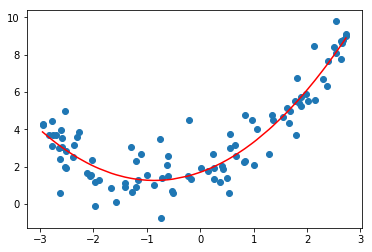

In [12]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [13]:
lin_reg2.score(X2, y)

0.8432736842890663

In [14]:
lin_reg2.intercept_

1.6981428841540085

### 关于PolynomialFeatures

In [16]:
X = np.arange(1, 11).reshape(-1, 2)

In [17]:
X.shape

(5, 2)

In [18]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [19]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X) 

In [20]:
X2.shape

(5, 6)

In [21]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [22]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X) 

In [23]:
X3.shape

(5, 10)

In [24]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

## Pipline

In [25]:
x = np.random.uniform(-3, 3, size=100)  # 均匀分布
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_sclar", StandardScaler()),
     ("lin_reg", LinearRegression())
])

In [30]:
poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_sclar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [31]:
y_predict = poly_reg.predict(X)

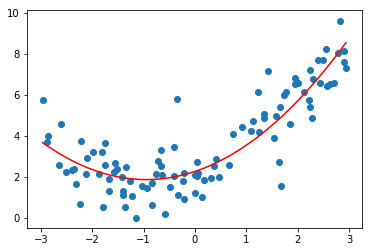

In [32]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()